In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [6]:
# Read the Excel file into a DataFrame
df = pd.read_excel('Master SKU List.xlsx')

# Drop rows with values of $0.00 in price
df2 = df[(df['Gross Price ($)'] != 0) & (df['Gross Price ($)'] != '$0.00')]


df2.to_excel('cleaned.xlsx', index=False)


In [7]:
numeric_columns = df2.select_dtypes(include=np.number)
df_cleaned = df2.fillna(numeric_columns.mean())

for column, dtype in df_cleaned.dtypes.items():
    print(f"Column '{column}' has data type '{dtype}'")
    


Column 'Status' has data type 'object'
Column 'SKU' has data type 'object'
Column 'Product Name' has data type 'object'
Column 'Application' has data type 'object'
Column 'Config' has data type 'object'
Column 'Insert Style' has data type 'object'
Column 'Box Style' has data type 'object'
Column 'Material' has data type 'object'
Column 'Mfg. Method' has data type 'object'
Column 'Insert Cell Length (in)' has data type 'float64'
Column 'Insert Cell Width (in)' has data type 'float64'
Column 'Insert Cell Depth (in)' has data type 'float64'
Column 'Insert Cutout Diameter (in)' has data type 'float64'
Column 'Insert Cutout Height (in)' has data type 'float64'
Column 'Blank Size Corr Dir (in)' has data type 'float64'
Column 'Blank Size Opp Corr Dir' has data type 'float64'
Column 'Blank Size Area (in²)' has data type 'float64'
Column 'Single Unit Mtrl Yield (in²)' has data type 'int64'
Column 'Single Unit Inches of Rule' has data type 'float64'
Column 'Box Internal Length' has data type 'fl

In [8]:
print(df_cleaned)

     Status                 SKU  \
3    Listed            F0004-3A   
4    Listed            F0004-5A   
5    Listed           F0004-5A1   
6    Listed            F0005-1E   
8    Listed    F0007-1D-B STOCK   
..      ...                 ...   
147     Add            F0251-L1   
160  Listed  F0058X1/F0059X1-1G   
161  Listed  F0058X1/F0059X2-1G   
162  Listed  F0058X1/F0059X3-1G   
163  Listed            F0059-1G   

                                          Product Name   Application  Config  \
3                        8 oz Aura 3-Pack Shipping Box  Shipping Box  3-Pack   
4    11 oz 917CD Heavy Base Rocks Tumbler 3-Pack Sh...  Shipping Box  3-Pack   
5             12.5 oz 2917 Tumbler 3-Pack Shipping Box  Shipping Box  3-Pack   
6    9 oz Straight Sided Glass Jar 3-Pack Shipping Box  Shipping Box  3-Pack   
8             8 oz Candle Tin 3-Pack Shipper - B STOCK  Shipping Box  3-Pack   
..                                                 ...           ...     ...   
147               9

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

summary_statistics = df_cleaned.describe()

print(summary_statistics)


numeric_columns = df_cleaned.select_dtypes(include=['number'])



       Insert Cell Length (in)  Insert Cell Width (in)  \
count                70.000000               70.000000   
mean                  3.197524                3.197524   
std                   0.573063                0.573063   
min                   1.250000                1.250000   
25%                   2.979068                2.979068   
50%                   3.208137                3.208137   
75%                   3.406250                3.406250   
max                   4.187500                4.187500   

       Insert Cell Depth (in)  Insert Cutout Diameter (in)  \
count               70.000000                    70.000000   
mean                 4.042453                     3.095703   
std                  0.495082                     0.040333   
min                  3.187500                     2.875000   
25%                  3.625000                     3.095703   
50%                  4.042453                     3.095703   
75%                  4.359375              

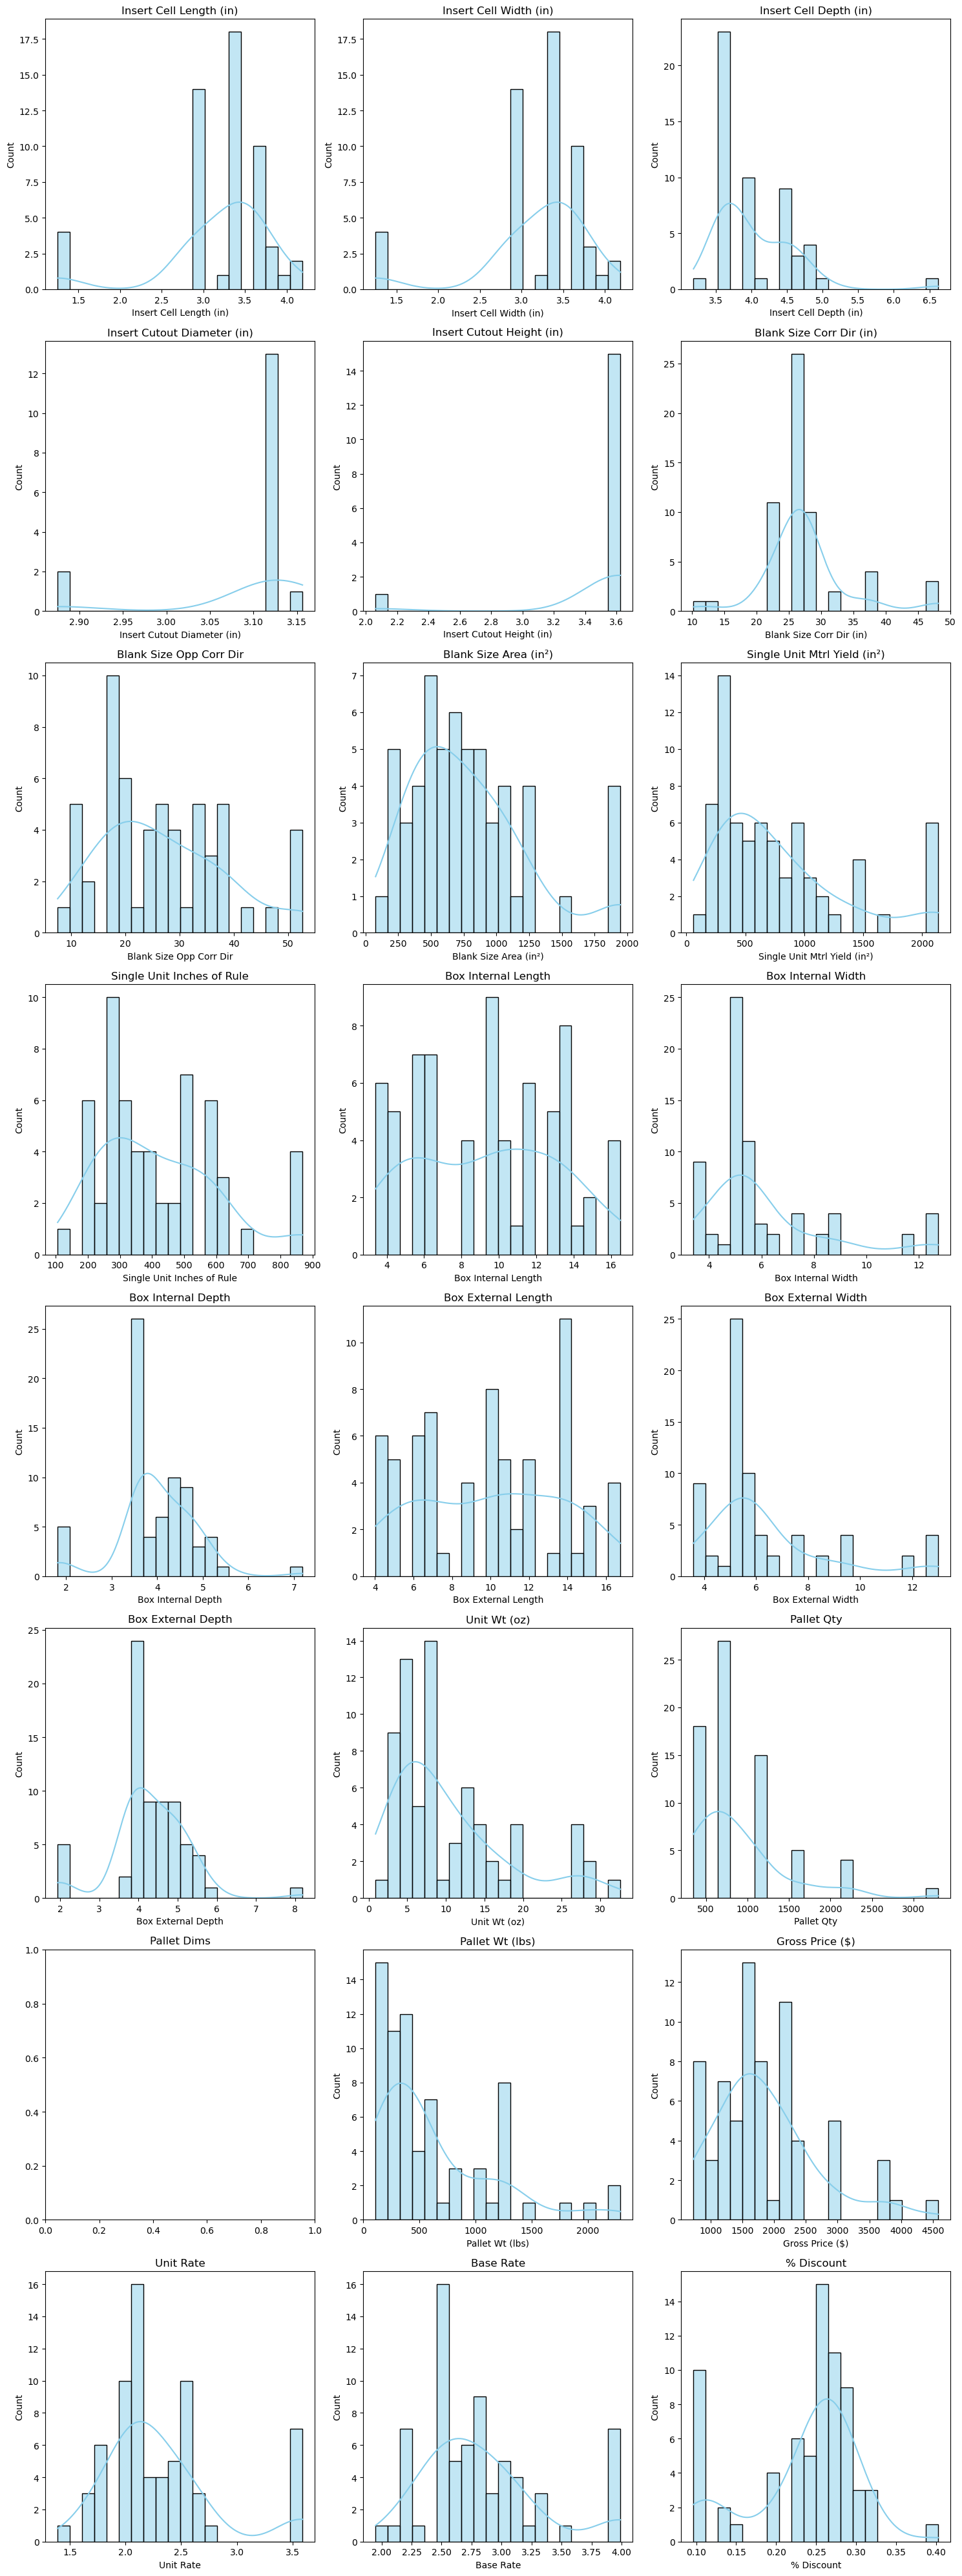

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#histograms of all of the data with numeric values 

numeric_columns = df_cleaned.select_dtypes(include=['number'])

num_cols = 3 

num_rows = -(-len(numeric_columns.columns) // num_cols)  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    sns.histplot(data=df, x=col, ax=axes[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    axes[i].set_title(col)

for j in range(len(numeric_columns.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [13]:

# Define X and Y variables
X = df_cleaned[['Insert Cell Length (in)', 'Insert Cell Width (in)',
       'Insert Cell Depth (in)', 'Insert Cutout Diameter (in)',
       'Insert Cutout Height (in)', 'Blank Size Corr Dir (in)',
       'Blank Size Opp Corr Dir', 'Blank Size Area (in²)',
       'Single Unit Mtrl Yield (in²)', 'Single Unit Inches of Rule',
       'Box Internal Length', 'Box Internal Width', 'Box Internal Depth',
       'Box External Length', 'Box External Width', 'Box External Depth',
       'Unit Wt (oz)']]
Y = df_cleaned['Unit Rate']

# Add constant term to X (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Unit Rate   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     3.508
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           0.000289
Time:                        17:32:02   Log-Likelihood:                -26.621
No. Observations:                  70   AIC:                             87.24
Df Residuals:                      53   BIC:                             125.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [7]:
Breakdown of the results:
1. In this output, none of the coefficients have p-values below 0.05, which suggests that none of the independent 
variables are statistically significant predictors of the dependent variable at the conventional significance level.
2. Also it seems the data is only accurate for Blank Size Area (in²) and Single Unit Mtrl Yield (in²)
3. Also it seems much of the data has very strong positive or negative correlations, but I would proceed with caution
for all of this data as the CI is incredibley large for all value except for Blank Size Area (in²) and Single Unit Mtrl 
Yield (in²) which show a negative correlatopn

SyntaxError: invalid syntax (4165862218.py, line 1)

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "Q('Unit Rate') ~ Q('Insert Cell Length (in)') + Q('Insert Cell Width (in)') + Q('Insert Cell Depth (in)') + Q('Insert Cutout Diameter (in)') + Q('Insert Cutout Height (in)') + Q('Blank Size Corr Dir (in)') + Q('Blank Size Opp Corr Dir') + Q('Blank Size Area (in²)') + Q('Single Unit Mtrl Yield (in²)') + Q('Single Unit Inches of Rule') + Q('Box Internal Length') + Q('Box Internal Width') + Q('Box Internal Depth') + Q('Box External Length') + Q('Box External Width') + Q('Box External Depth') + Q('Unit Wt (oz)') + Q('Pallet Wt (lbs)') +Q('Base Rate') + Q('% Discount')"
model = ols(formula, data=df_cleaned).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                     sum_sq    df            F        PR(>F)
Q('Insert Cell Length (in)')       0.003793   1.0    17.039256  1.386456e-04
Q('Insert Cell Width (in)')        0.003793   1.0    17.039256  1.386456e-04
Q('Insert Cell Depth (in)')        0.001699   1.0     7.632737  7.999648e-03
Q('Insert Cutout Diameter (in)')   0.000235   1.0     1.056140  3.090433e-01
Q('Insert Cutout Height (in)')     0.000199   1.0     0.894891  3.487046e-01
Q('Blank Size Corr Dir (in)')      0.006322   1.0    28.398561  2.364126e-06
Q('Blank Size Opp Corr Dir')       0.006400   1.0    28.749040  2.107181e-06
Q('Blank Size Area (in²)')         0.002079   1.0     9.341012  3.590921e-03
Q('Single Unit Mtrl Yield (in²)')  0.000746   1.0     3.353351  7.302989e-02
Q('Single Unit Inches of Rule')    0.007067   1.0    31.746890  8.050546e-07
Q('Box Internal Length')           0.009588   1.0    43.070780  2.899284e-08
Q('Box Internal Width')            0.010123   1.0    45.475697  1.511859e-08

In [ ]:

Breakdown of the results:

1. For most of the independent variables, the p-values are greater than 0.05, indicating that these variables are not statistically significant predictors of the dependent variable at the 0.05 significance level.
2. However, the independent variables `Q('Pallet Wt (lbs)')`, `Q('Base Rate')`, and `Q('% Discount')` have p-values less than 0.05, suggesting that these variables are statistically significant predictors of the dependent variable at the 0.05 significance level.
3. The `Residual` row represents the unexplained variance in the dependent variable by the independent variables included in the model. The degrees of freedom for the residuals are 49.

Overall, it seems that the variables related to pallet weight, unit rate, base rate, and percent discount have significant effects on the dependent variable, while others do not.

In [16]:
df2 = pd.read_excel('Purchase Prices By Sku.xlsx')

df1 = pd.read_excel('Master SKU List.xlsx')

def extract_first_five(s):
    return s[:5] 

df1.rename(columns={'SKU': 'Sku'}, inplace=True)


df1['Sku'] = df1['Sku'].apply(extract_first_five)

merged_df = pd.merge(df1, df2, on='Sku', how='outer')



In [17]:
print(merged_df)

     Status    Sku                                  Product Name  \
0    Listed  F0003                  8 oz Candle Tin Shipping Box   
1    Listed  F0003                  8 oz Candle Tin Shipping Box   
2    Listed  F0003                  8 oz Candle Tin Shipping Box   
3    Listed  F0003                  8 oz Candle Tin Shipping Box   
4    Listed  F0004     8 oz Square Mason Jar 3-Pack Shipping Box   
..      ...    ...                                           ...   
491  Listed  F0176  4 oz Ball Mini Mason Jar 4-Pack Shipping Box   
492  Listed  F0186  4 oz Ball Mini Mason Jar 8-Pack Shipping Box   
493  Listed  F0228   5 oz Glass Woozy Bottle 6-Pack Shipping Box   
494  Listed  F0228   5 oz Glass Woozy Bottle 6-Pack Shipping Box   
495  Listed  F0059             1 oz Glass Bottle Shipping Insert   

      Application  Config Insert Style           Box Style  \
0    Shipping Box  Single     Attached        RETF - Econo   
1    Shipping Box  Single     Attached        RETF - Econo 

In [19]:
merged_df.to_excel('merged_df.xlsx', index=False)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
summary_statistics = merged_df.describe()

print(summary_statistics)

       Insert Cell Length (in)  Insert Cell Width (in)  \
count               316.000000              316.000000   
mean                  3.159909                3.158030   
std                   0.465357                0.467246   
min                   1.250000                1.250000   
25%                   2.875000                2.875000   
50%                   3.125000                3.125000   
75%                   3.375000                3.375000   
max                   4.531250                4.531250   

       Insert Cell Depth (in)  Insert Cutout Diameter (in)  \
count              316.000000                   145.000000   
mean                 4.170985                     3.000216   
std                  0.798340                     0.285569   
min                  2.062500                     2.062500   
25%                  3.625000                     3.125000   
50%                  3.937500                     3.125000   
75%                  4.750000              